<a href="https://colab.research.google.com/github/zhangwiki86-soton/Python-Files-for-Practice/blob/main/regression_mtcars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression with scikit-learn

This notebook introduces linear regression using the scikit-learn package. We start by loading data with pandas. We will create a linear regression model firstly using a single predictive variable (univariate model) and then several variables (multivariate model).  We will select the columns that we need to train the model, fit the model and make predictions.

We will also look at how to scale features. This is not strictly necessary for linear regression models but some other ML models, such as K-Nearest Neighbors (KNN)
K-Means Clustering and Support Vector Machines (SVM) do require it

In these examples we will use a small example dataset. We will visualise the data using the matplotlib package.

In later examples, we will split the data into training and test datasets so we can evaluate the model but in this example the focus is on the basics of scikit-learn so we won't do that.

## The mtcars example dataset

MT Cars is a famous statistical dataset. The data comes from the 1974 Motor Trend US magazine and contains fuel consumption and 10 aspects of automobile design and performance for 32 supercars of the time. The objective of this exercise is to analyse what factors contribute to fuel efficiency (measured in the mpg column).  The [mtcars dataset page](https://zomalex.co.uk/datasets/mt_cars_dataset.html) has full details.

The import statements below use numpy, pandas and several modules from scikit-learn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

Load the mtcars dataset using pandas and display the first few rows.

In [2]:
df = pd.read_csv('https://zomalextrainingstorage.blob.core.windows.net/datasets/misc/mtcars.csv')
df.head(2)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


Models are trained using a set of features (X) and a target variable (y). In this case, we have only one feature (weight) and one target variable (miles per gallon). This is univariate linear regression.

In [7]:
X = df.loc[:, ['wt']] # this is a pandas dataframe
y = df.loc[:,  'mpg'] # this is a pandas series
#n=df.loc[0,:]
#X.shape, y.shape

## Visualise the data

Plot the relationship between 'wt' (weight) and 'mpg' (miles per gallon).

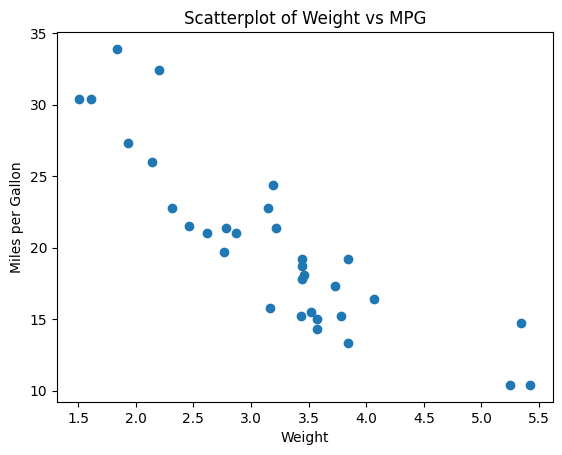

In [8]:
plt.scatter(X, y)
plt.xlabel('Weight')
plt.ylabel('Miles per Gallon')
plt.title('Scatterplot of Weight vs MPG')
plt.show()

## Univariate linear regression model

Our first machine learning model uses linear regression to find a relationship between two numeric variables.

In [9]:
model1 = linear_model.LinearRegression()
model1.fit(X.values, y)#we train the model with fit
print(f'model1.coef_, {model1.coef_}\nmodel1.intercept_: , {model1.intercept_}')

# intercept is when X =0, coef is the slop if when weight increased by 1, mile per galon drop by 5.344

model1.coef_, [-5.34447157]
model1.intercept_: , 37.28512616734204


Using the model, predict the mpg of a car that weighs 3,000 lbs (3.0 in the dataset).

In [10]:
example_weight = 3.0
example_weight_array = np.array([[example_weight]]) # expects 2D numpy array
mpg_pred1 = model1.predict(example_weight_array)
print(f'Predicted MPG for weight 3.0: {mpg_pred1[0]}')

Predicted MPG for weight 3.0: 21.25171144917401


In [12]:
# Predict the values from the model
y_pred = model1.predict(X.values)
y_pred

array([23.28261065, 21.9197704 , 24.88595212, 20.10265006, 18.90014396,
       18.79325453, 18.20536265, 20.23626185, 20.45004071, 18.90014396,
       18.90014396, 15.53312687, 17.3502472 , 17.08302362,  9.22665041,
        8.29671236,  8.71892561, 25.52728871, 28.65380458, 27.47802083,
       24.11100374, 18.47258623, 18.92686632, 16.76235533, 16.73563297,
       26.94357367, 25.847957  , 29.19894068, 20.34315128, 22.48093991,
       18.20536265, 22.4274952 ])

Recreate the scatter plot and add the regression line from the model.

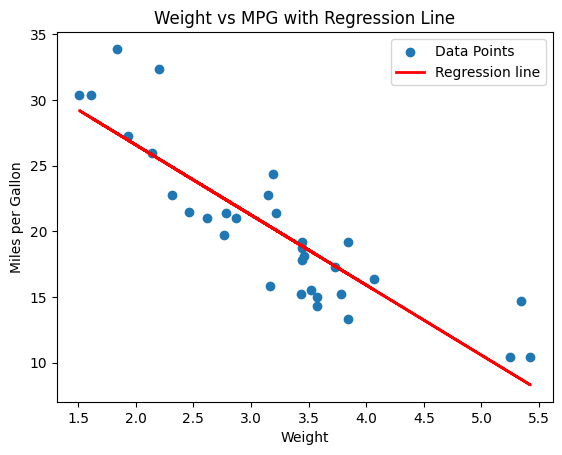

In [13]:
plt.scatter(X, y, label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Weight')
plt.ylabel('Miles per Gallon')
plt.title('Weight vs MPG with Regression Line')
plt.legend()
plt.show()

## Multivariate linear regression model

Multivariate regression uses several variables to predict the target variable. We use these columns:

* weight (wt)
* horsepower (hp)
* am, denotes either automatic (am = 0) manual transmission (am = 1)
* vs, denotes either V-shaped (vs=0) or straight (vs=1) engine type

In [ ]:
X2 = df.loc[:, ['wt', 'hp', 'am', 'vs']]
X2.shape

Note that there are now two coefficients, one for each feature.

In [ ]:
model2 = linear_model.LinearRegression()
model2.fit(X2.values, y)
print(f'model2.coef_, {model2.coef_}\nmodel2.intercept_: , {model2.intercept_}')

Using the multivariate model, predict the mpg of a car that weighs 3,000 lbs (3.0 in the dataset) and has a horsepower of 110.

In [ ]:
example_weight = 3.0
example_horsepower = 110
example_am = 1 # manual transmission
example_vs = 0 # v-shaped engine
example_array = np.array([[example_weight, example_horsepower, example_am, example_vs]]) # expects 2D numpy array
mpg_pred2 = model2.predict(example_array)
print(f'Predicted MPG for weight 3.0 and horsepower 110, manual transmission, v-shaped engine: {mpg_pred2[0]:.2f}')

# Scaling features

Different features have different ranges. Weight is typically between 1.5 and 5.5 (thousands of lbs) while horsepower ranges from about 50 to over 300. Features with larger ranges can dominate the model training process and lead to worse models. To avoid this, we can scale the features to a common range using standardization (z-score normalization).  This involves subtracting the mean and dividing by the standard deviation for each feature.


In [ ]:
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2.values)
print(f'X2[:5]\n{X2.values[:5]}\nX2_scaled[:5]:\n{X2_scaled[:5]}')

In [ ]:
model2_scaled = linear_model.LinearRegression()
model2_scaled.fit(X2_scaled, y)
print(f'model2_scaled.coef_, {model2_scaled.coef_}\nmodel2_scaled.intercept_: {model2_scaled.intercept_:.2f}')

We now need to scale any new data points before making predictions.

In [ ]:
example_array_scaled = scaler.transform(example_array)
example_array_scaled

In [ ]:
mpg_pred2_scaled = model2_scaled.predict(example_array_scaled)
print(f'Predicted MPG for weight 3.0 and horsepower 110, manual transmission, v-shaped engine:  (scaled): {mpg_pred2_scaled[0]:.2f}')

END OF TUTORIAL